
#<font color="red">Install Gdown</font>

In [1]:
!pip install gdown


#<font color="red">Download & Unzip the Pre-trained Model from Dlib</font>

In [3]:
!gdown http://dlib.net/files/mmod_human_face_detector.dat.bz2
!bunzip2 /content/mmod_human_face_detector.dat.bz2

Downloading...
From: http://dlib.net/files/mmod_human_face_detector.dat.bz2
To: /content/mmod_human_face_detector.dat.bz2
100% 695k/695k [00:00<00:00, 4.33MB/s]



#<font color="red">Download a Test Dataset</font>

In [4]:
!gdown https://i2-prod.dailystar.co.uk/incoming/article26682993.ece/ALTERNATES/s810/1_Screenshot-2022-04-11-at-081923.png

Downloading...
From: https://i2-prod.dailystar.co.uk/incoming/article26682993.ece/ALTERNATES/s810/1_Screenshot-2022-04-11-at-081923.png
To: /content/1_Screenshot-2022-04-11-at-081923.png
100% 34.6k/34.6k [00:00<00:00, 11.9MB/s]



#<font color="red">Install Libraries: OpenCV, Dlib</font>

In [5]:
!pip install -U opencv-python
!pip install dlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 MB 13.4 MB/s eta 0:00:00
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.8.0.76
    Uninstalling opencv-python-4.8.0.76:
      Successfully uninstalled opencv-python-4.8.0.76
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 75.0 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


#<font color="red">Import OpenCV, Dlib ML Toolkit and matplotlib </font>

In [6]:
import cv2
import dlib
import matplotlib.pyplot as plt

#<font color="red">Set path for the pre-trained Model & Sample test set</font>

In [11]:
CLASSIFIER_PATH = '/content/mmod_human_face_detector.dat'
IMAGE_PATH = "/content/1_Screenshot-2022-04-11-at-081923.png"

#<font color="red">Function for Face Detection (Bounding Box)</font>

In [8]:
def get_xywh(detection):
    rectangle = detection.rect
    top_left = rectangle.tl_corner()
    x, y = top_left.x, top_left.y
    w = rectangle.width()
    h = rectangle.height()
    return x, y, w, h

#<font color="red">Check Image without Bounding Box</font>

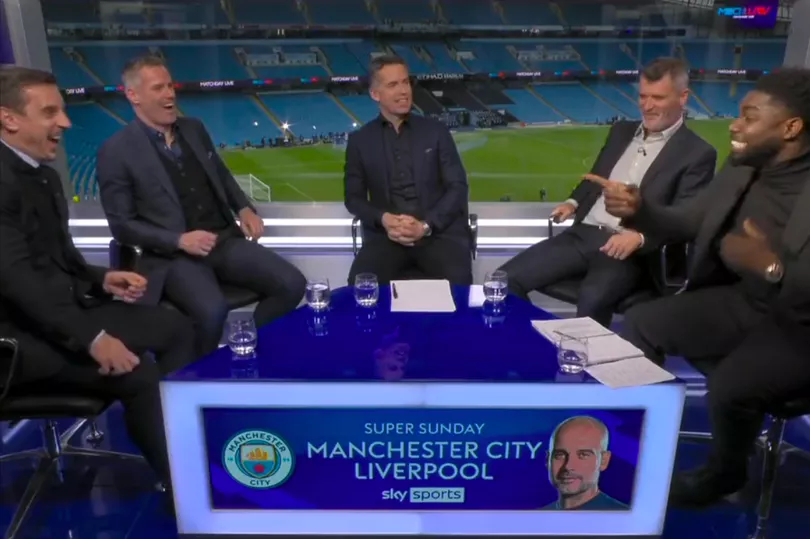

In [9]:
from IPython.display import Image
Image('/content/1_Screenshot-2022-04-11-at-081923.png')


#<font color="red">Create image object OpenCV</font>

In [10]:
bgr_img = cv2.imread(IMAGE_PATH)
rgb_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)


#<font color="red">Load the Pre-trained Classifier</font>

In [12]:
detector = dlib.cnn_face_detection_model_v1(CLASSIFIER_PATH)


#<font color="red">Face Detection Using Pre-trained Classifier</font>

In [14]:
detections = detector(rgb_img, 1)
detections = tuple(detections)
detections

(<_dlib_pybind11.mmod_rectangle at 0x797fbed20b70>,
 <_dlib_pybind11.mmod_rectangle at 0x797fbed215f0>)


#<font color="red">Convert the Result of Face Detection (xywh) into tuple(s)</font>

In [15]:
faces = sorted(tuple(get_xywh(data)) for data in detections)
faces = tuple(faces)
faces

((13, 96, 58, 58),
 (137, 73, 40, 41),
 (377, 69, 40, 41),
 (543, 430, 58, 58),
 (637, 81, 40, 41),
 (722, 96, 57, 58))


#<font color="red">Plot all the face detected</font>

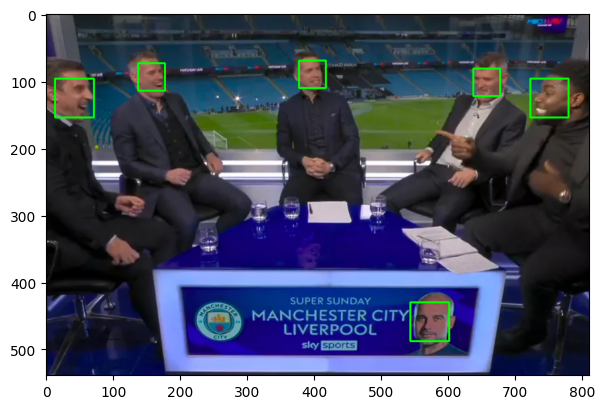

In [16]:
rgb_color = (0, 255, 0)
for face in faces:
    x, y, w, h = face
    cv2.rectangle(rgb_img, (x, y), (x+w, y+h), rgb_color, 2)

plt.figure(figsize=(7, 7))
plt.imshow(rgb_img)